In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle
%matplotlib inline

In [59]:
# load the date
data = pd.read_csv('./data/edited.csv', parse_dates=['datetime'])
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,day of week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


In [60]:
feature_to_normalize = ['temp', 'atemp', 'humidity', 'windspeed']
data[feature_to_normalize] = pd.DataFrame(normalize(data[feature_to_normalize]))

In [61]:
# split the data into features and target 
X = data[feature_to_normalize]
y = data['count']

In [62]:
X.head()

,temp,atemp,humidity,windspeed
0,9.84,14.395,81,0.0
1,9.02,13.635,80,0.0
2,9.02,13.635,80,0.0
3,9.84,14.395,75,0.0
4,9.84,14.395,75,0.0


In [63]:
# split the data into train and test with 0.8 for train data
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=1)

In [64]:
# instatiate the model
model = LinearRegression()
# fit the data
model.fit(train_X, train_y)
# get the parameter and intercept
print('Coefficent: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficent:  [ 0.55017984  6.49745757 -2.45332776  0.99315182]
Intercept:  154.16834787088607


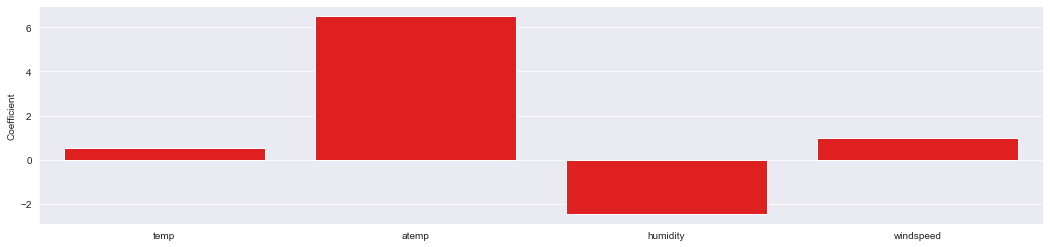

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize = (18,4))
coeff = pd.DataFrame(model.coef_, index = X.columns, columns = ['Coefficient'])
sns.barplot(x = coeff.index, y = 'Coefficient', data = coeff, color='red')
plt.show()

In [66]:
# predict the test data
predicted_y = model.predict(test_X)
predicted_y

array([ 83.29005662, 340.48817876,  96.57406258, ..., 173.26152196,
       218.469126  , 189.96485586])

In [67]:
mean_absolute_error(predicted_y, test_y)

102.56501898971908

In [68]:
pickle.dump(model, open('./model.sav', 'wb'))

In [42]:
X.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'month', 'day', 'day of week', 'hour'],
      dtype='object')

In [45]:
list(X.loc[0].values)

[1.0,
 0.0,
 0.0,
 1.0,
 0.11876090844342149,
 0.1737361053905541,
 0.9776050390159696,
 0.0,
 1.0,
 1.0,
 5.0,
 0.0]

In [46]:
model.predict([list(X.loc[0].values)])

array([-33.1247299])

In [48]:
lm = pickle.load(open('./model.sav', 'rb'))

In [50]:
lm.coef_

array([-3.26612447e+00,  1.85590126e+01, -5.11332843e+00, -4.98027820e+00,
        4.15516276e+02,  2.06084196e+02,  1.16602510e+02,  9.74162180e+01,
        6.91875391e+00,  1.52925189e-01,  2.00316088e+00,  7.06314928e+00])

In [74]:
sample = [None, 5, 1 ,3]
x = np.array(sample)
if None in x:
    print('yes')

yes
